# Notebook 5: Regression Analysis

To further dive into the correlations between demographics (i.e., race/ethnicity, student status) and per-pupil spending, we will perform regression analyses.

We will first create a **heat map** to visualize the correlations between the demographic variables and per-pupil spending.

We will then perform **linear regression analyses** to determine the relationship between each demographic variable and per-pupil spending. We will identify the demographic variable with the strongest correlation to per-pupil spending and check for significance ($$p<0.05$$).

Finally, we will perform **multiple regression analyses** to determine how much of the variance in per-pupil spending can be explained by the demographic variables.

## 1.0. Project Dependencies

### 1.1. Import Libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2. Import Cleaned Data CSV

In [2]:
district_and_expenses = pd.read_csv('district_and_expenses.csv')

display(district_and_expenses)

,Fed ID,District Code,CDS Code,County Name,District Type,Grade Low,Grade High,Grade Low Census,Grade High Census,Assistance Status,...,Students with Disabilities (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),District Label,District Name,EDP 365,Expense ADA,Expense per ADA,LEA Type,Decimal Difference
0,601770.0,61119,1.611190e+12,Alameda,Unified,KG,12,KG,12,General Assistance,...,12.200000,4035.0,38.200000,Alameda Unified (Alameda),Alameda Unified,1.550948e+08,8567.86,18101.93,Unified,0.232163
1,601860.0,61127,1.611270e+12,Alameda,Unified,KG,12,KG,12,General Assistance,...,9.000000,1122.0,31.400000,Albany City Unified (Alameda),Albany City Unified,6.149090e+07,3435.41,17899.14,Unified,0.040342
2,604740.0,61143,1.611430e+12,Alameda,Unified,KG,12,KG,12,General Assistance,...,12.000000,2508.0,27.600000,Berkeley Unified (Alameda),Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified,0.058892
3,607800.0,61150,1.611500e+12,Alameda,Unified,KG,12,KG,12,General Assistance,...,11.000000,3686.0,38.800000,Castro Valley Unified (Alameda),Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified,0.055328
4,612630.0,61168,1.611680e+12,Alameda,Unified,KG,12,KG,12,General Assistance,...,12.500000,327.0,54.500000,Emery Unified (Alameda),Emery Unified,1.586300e+07,554.70,28597.44,Unified,0.081666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,NaN,76349,NaN,Mendocino,Elementary,KG,12,KG,8,General Assistance,...,14.883721,243.0,56.511628,Arena Union Elementary/Point Arena Joint Union...,Arena Union Elementary/Point Arena Joint Union...,1.016266e+07,325.53,31218.80,Comm Admin,0.320923
928,NaN,40261,NaN,Santa Cruz,Elementary,KG,5,KG,5,General Assistance,...,14.636480,2304.0,36.734694,Santa Cruz City Elementary/High (Santa Cruz),Santa Cruz City Elementary/High,1.152800e+08,5688.18,20266.58,Comm Admin,0.102637
929,NaN,40246,NaN,Sonoma,Elementary,KG,12,KG,6,NaN,...,17.717921,3326.0,45.018950,Petaluma City Elementary/Joint Union High (Son...,Petaluma City Elementary/Joint Union High,1.252075e+08,6651.17,18824.88,Comm Admin,0.110782
930,NaN,40253,NaN,Sonoma,Elementary,KG,8,KG,6,NaN,...,17.340181,7541.0,50.959589,Santa Rosa City Schools (Sonoma),Santa Rosa City Schools,2.486762e+08,11701.14,21252.30,Comm Admin,0.264663


## 2.0. Demographics Heat Map

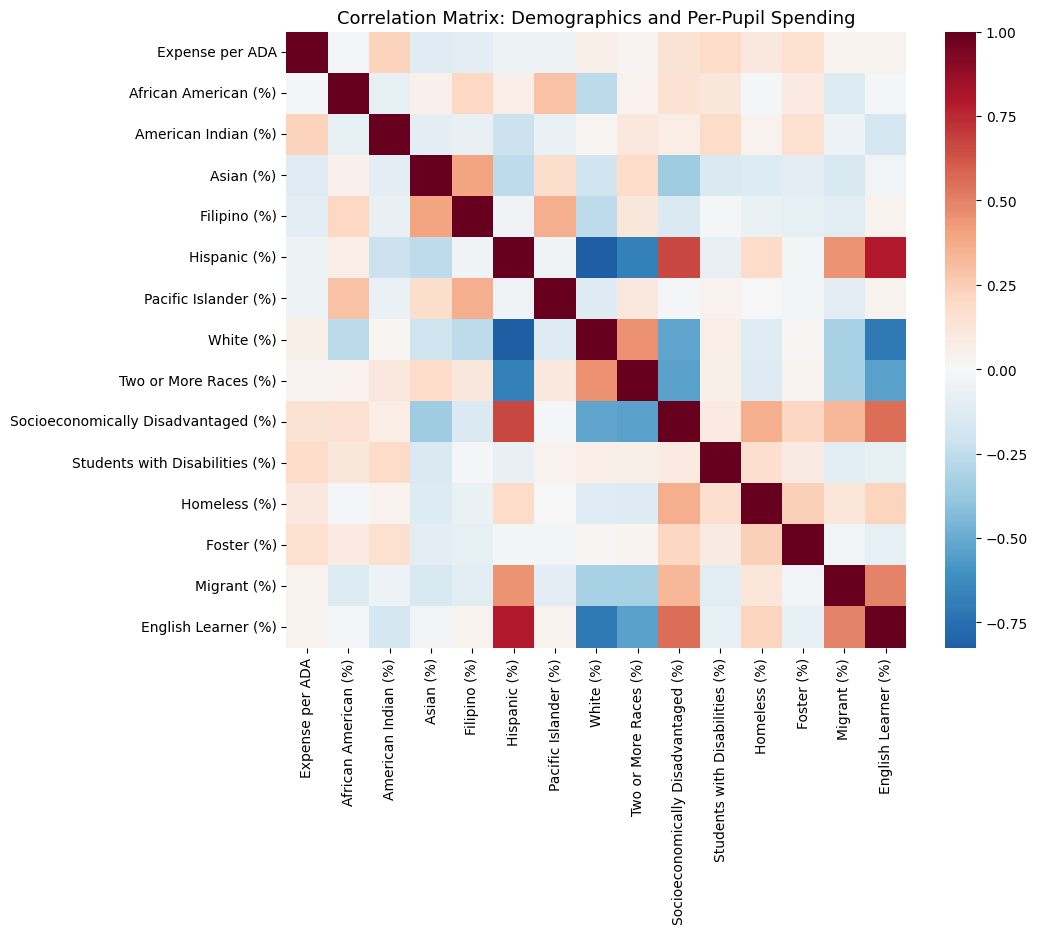

In [3]:
# Demographic & Student Status Columns
cols = [
    'Expense per ADA',
    'African American (%)', 'American Indian (%)', 'Asian (%)',
    'Filipino (%)', 'Hispanic (%)', 'Pacific Islander (%)',
    'White (%)', 'Two or More Races (%)',
    'Socioeconomically Disadvantaged (%)', 'Students with Disabilities (%)',
    'Homeless (%)', 'Foster (%)', 'Migrant (%)', 'English Learner (%)'
]

corr = district_and_expenses[cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', center=0, annot=False)
plt.title('Correlation Matrix: Demographics and Per-Pupil Spending', fontsize=13)
plt.show()

## 3.0. Demographics Regression Analysis

### 3.1. SED vs. Expense per ADA (Linear Regression)

In [4]:
X = district_and_expenses['Socioeconomically Disadvantaged (%)']
y = district_and_expenses['Expense per ADA']
X = sm.add_constant(X)
model_3_1 = sm.OLS(y, X).fit()

print(model_3_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Expense per ADA   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     19.65
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.04e-05
Time:                        17:08:57   Log-Likelihood:                -9994.1
No. Observations:                 932   AIC:                         1.999e+04
Df Residuals:                     930   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### 3.2. Demographics vs. Expense per ADA (Linear Regression)

In [5]:
demographic_cols = [
    'African American (%)', 'American Indian (%)', 'Asian (%)', 'Filipino (%)',
    'Hispanic (%)', 'Pacific Islander (%)', 'White (%)', 'Two or More Races (%)',
    'Socioeconomically Disadvantaged (%)', 'Students with Disabilities (%)',
    'Homeless (%)', 'Foster (%)', 'Migrant (%)', 'English Learner (%)'
]

results = []

for col in demographic_cols:
    X = sm.add_constant(district_and_expenses[col])
    y = district_and_expenses['Expense per ADA']
    model = sm.OLS(y, X).fit()
    results.append({
        'Variable': col,
        'Slope (Funding per 1% Increase)': model.params[col],
        'R_squared': model.rsquared,
        'p-value': model.pvalues[col]
    })

reg_summary_3_2 = pd.DataFrame(results).sort_values('R_squared', ascending=False)

display(reg_summary_3_2)

,Variable,Slope (Funding per 1% Increase),R_squared,p-value
1,American Indian (%),363.038118,0.050119,4.735698e-12
9,Students with Disabilities (%),467.717097,0.035582,6.509304e-09
11,Foster (%),1417.501283,0.026663,5.386721e-07
8,Socioeconomically Disadvantaged (%),66.061620,0.020694,1.039568e-05
2,Asian (%),-122.950513,0.014335,2.488163e-04
3,Filipino (%),-509.360260,0.011738,9.236463e-04
10,Homeless (%),231.948033,0.011400,1.096424e-03
6,White (%),25.330325,0.003222,8.327367e-02
4,Hispanic (%),-21.356998,0.002920,9.919650e-02
5,Pacific Islander (%),-1167.023190,0.002848,1.035043e-01


#### 3.2.1. Multiple Regression Analysis

In [6]:
X = district_and_expenses[demographic_cols]
X = sm.add_constant(X)
y = district_and_expenses['Expense per ADA']
model_multi = sm.OLS(y, X).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        Expense per ADA   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     10.39
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           4.78e-22
Time:                        17:08:57   Log-Likelihood:                -9935.3
No. Observations:                 932   AIC:                         1.990e+04
Df Residuals:                     917   BIC:                         1.997e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## 4.0 Locale Regression Analysis

### 4.1. Expense per ADA by Locale (ANOVA)

In [7]:
model_4_1 = smf.ols('Q("Expense per ADA") ~ C(Locale)', data=district_and_expenses).fit()

print(model_4_1.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Expense per ADA")   R-squared:                       0.053
Model:                              OLS   Adj. R-squared:                  0.049
Method:                   Least Squares   F-statistic:                     13.03
Date:                  Wed, 08 Oct 2025   Prob (F-statistic):           2.51e-10
Time:                          17:08:57   Log-Likelihood:                -9978.4
No. Observations:                   932   AIC:                         1.997e+04
Df Residuals:                       927   BIC:                         1.999e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

### 4.2. Locale & Demographics

In [8]:
model_locale_full = smf.ols(
    'Q("Expense per ADA") ~ C(Locale) + Q("Socioeconomically Disadvantaged (%)") \
     + Q("Students with Disabilities (%)") + Q("English Learner (%)") + Q("Foster (%)")',
    data=district_and_expenses
).fit()

print(model_locale_full.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Expense per ADA")   R-squared:                       0.123
Model:                              OLS   Adj. R-squared:                  0.116
Method:                   Least Squares   F-statistic:                     16.21
Date:                  Wed, 08 Oct 2025   Prob (F-statistic):           1.47e-22
Time:                          17:08:57   Log-Likelihood:                -9942.6
No. Observations:                   932   AIC:                         1.990e+04
Df Residuals:                       923   BIC:                         1.995e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=246b06f0-3e45-45e3-acef-efea2bae7701' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>